# Power Plant Energy Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("TRAIN.csv")
test = pd.read_csv("TEST.csv")

In [3]:
train

,AT,V,AP,RH,PE
0,22.85,60.29,1017.29,61.92,448.58
1,11.75,35.76,1018.99,57.92,473.01
2,12.24,44.90,1020.31,82.22,464.25
3,13.43,40.10,1015.82,87.90,471.77
4,4.65,35.19,1018.23,94.78,489.36
...,...,...,...,...,...
7995,18.74,45.09,1014.24,41.54,456.25
7996,15.43,40.89,1010.63,73.03,468.35
7997,12.36,52.75,1026.04,68.71,465.14
7998,25.98,73.18,1012.28,85.78,439.73


In [4]:
test

,AT,V,AP,RH
0,11.55,40.60,1014.44,87.06
1,6.61,38.91,1015.77,92.31
2,16.97,42.86,1013.92,74.80
3,21.90,57.76,1017.45,66.89
4,9.73,40.22,1011.48,87.88
...,...,...,...,...
1563,17.37,58.49,1012.20,91.14
1564,21.50,59.87,1019.05,76.56
1565,8.84,42.49,1010.28,89.09
1566,21.06,50.59,1016.42,66.12


In [5]:
train.describe()

,AT,V,AP,RH,PE
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,19.677299,54.302629,1013.235534,73.260477,454.310364
std,7.448395,12.687358,5.920858,14.588452,17.056199
min,2.340000,25.360000,993.110000,25.560000,420.260000
25%,13.510000,41.740000,1009.070000,63.340000,439.727500
50%,20.320000,52.080000,1012.950000,74.880000,451.495000
75%,25.770000,66.540000,1017.190000,84.700000,468.400000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8000 non-null   float64
 1   V       8000 non-null   float64
 2   AP      8000 non-null   float64
 3   RH      8000 non-null   float64
 4   PE      8000 non-null   float64
dtypes: float64(5)
memory usage: 312.6 KB


In [7]:
train.shape

(8000, 5)

In [8]:
train.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

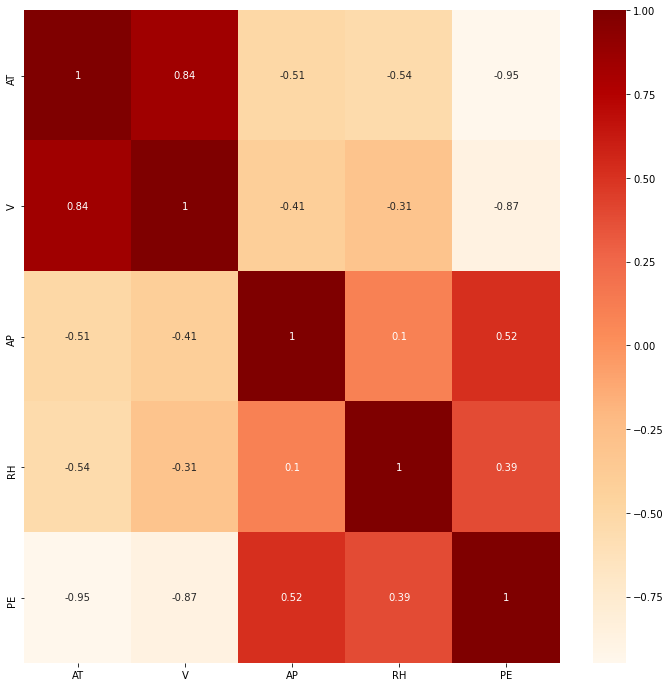

In [9]:
correlation = train.corr()

plt.figure(figsize=(12,12))
corr_heatmap=sns.heatmap(correlation,annot=True,cmap='OrRd')

<AxesSubplot:xlabel='AT', ylabel='PE'>

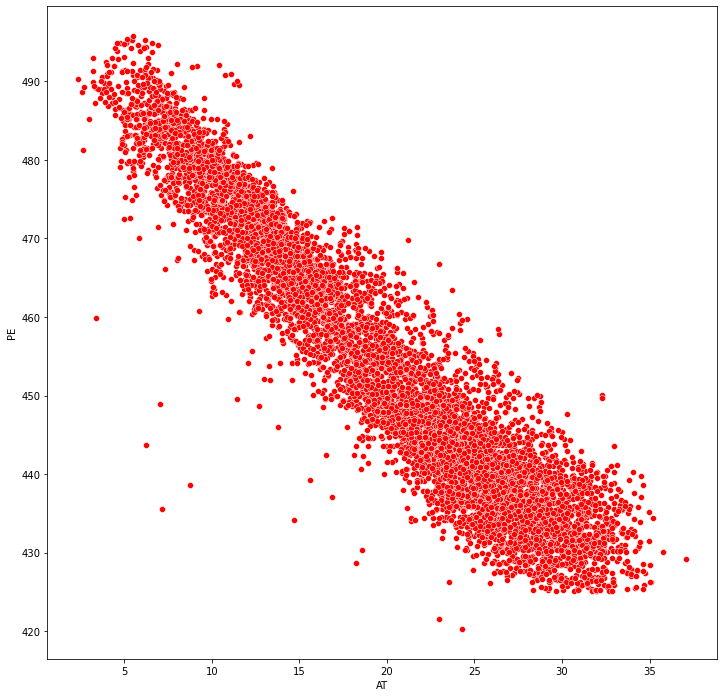

In [10]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='AT', y='PE', data=train, color='Red')

<AxesSubplot:xlabel='V', ylabel='PE'>

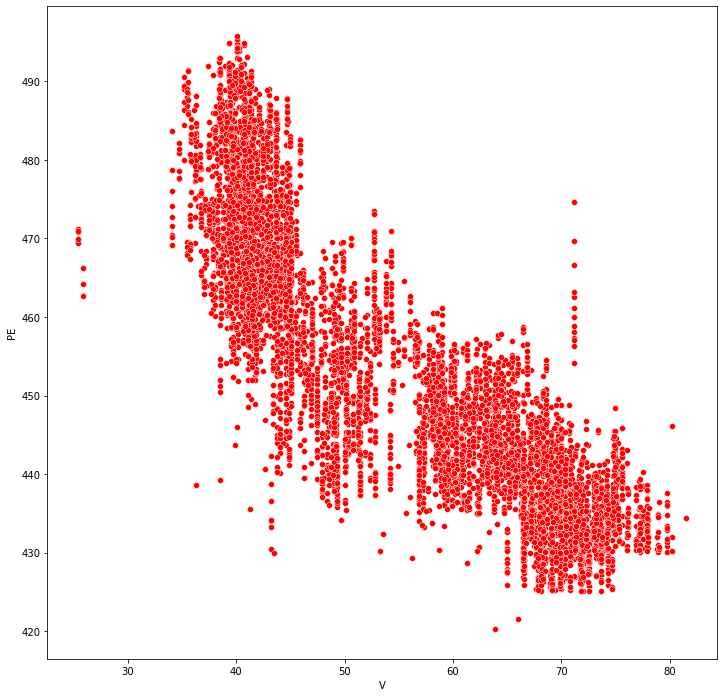

In [11]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='V', y='PE', data=train, color='Red')

In [12]:
x = train.iloc[:, 0:-1].values
y = train.iloc[:,-1].values

In [13]:
x

array([[  22.85,   60.29, 1017.29,   61.92],
       [  11.75,   35.76, 1018.99,   57.92],
       [  12.24,   44.9 , 1020.31,   82.22],
       ...,
       [  12.36,   52.75, 1026.04,   68.71],
       [  25.98,   73.18, 1012.28,   85.78],
       [   9.08,   42.49, 1010.67,   85.35]])

In [14]:
y

array([448.58, 473.01, 464.25, ..., 465.14, 439.73, 481.46])

In [15]:
x.shape

(8000, 4)

In [16]:
y.shape

(8000,)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [18]:
x_train.shape

(5333, 4)

In [19]:
x_test.shape

(2667, 4)

In [20]:
y_train.shape

(5333,)

In [21]:
y_test.shape

(2667,)

In [57]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [58]:
y_pred = dtr.predict(x_test)

In [59]:
y_pred

array([426.67, 432.43, 443.1 , ..., 483.28, 435.93, 458.18])

In [60]:
print(r2_score(y_pred, y_test))
print(np.sqrt(mean_squared_error(y_pred, y_test)))

0.9222452967088886
4.759302197310476


In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [62]:
y_pred = lr.predict(x_test)

In [63]:
y_pred

array([426.81688383, 429.02863467, 445.85322742, ..., 481.19045671,
       433.29016099, 458.97457227])

In [64]:
print(r2_score(y_pred, y_test))
print(np.sqrt(mean_squared_error(y_pred, y_test)))

0.9230359944721473
4.511341566360628


In [65]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100, random_state=1)
rfc.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [66]:
y_pred = rfc.predict(x_test)

In [67]:
y_pred

array([428.4522, 432.305 , 444.1191, ..., 484.5232, 432.5295, 454.808 ])

In [68]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_pred, y_test))
print(np.sqrt(mean_squared_error(y_pred, y_test)))

0.957174055272496
3.444000496134591


In [73]:
test_pred = rfc.predict(test)
print(test_pred)

[474.8385 488.31   463.0963 ... 479.7956 454.3613 478.804 ]


In [74]:
output = pd.DataFrame({"Index":[x for x in range(len(test_pred))], "Value":test_pred})

In [75]:
output.to_csv("output.csv", index=False)